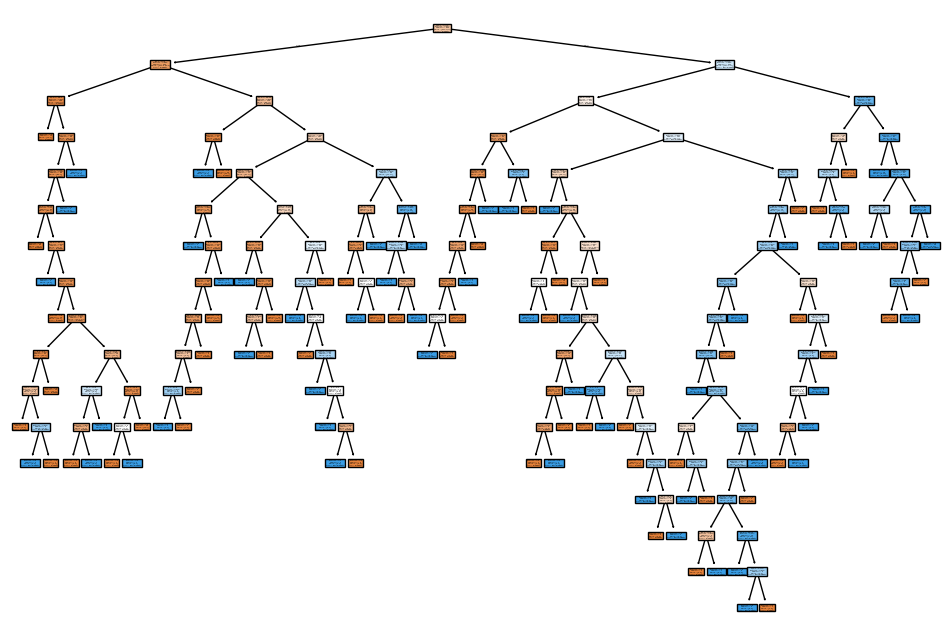

Accuracy: 0.6883116883116883
Confusion matrix:
 [[110  41]
 [ 31  49]]
Classification report:
               precision    recall  f1-score   support

         0.0       0.78      0.73      0.75       151
         1.0       0.54      0.61      0.58        80

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.69      0.69       231



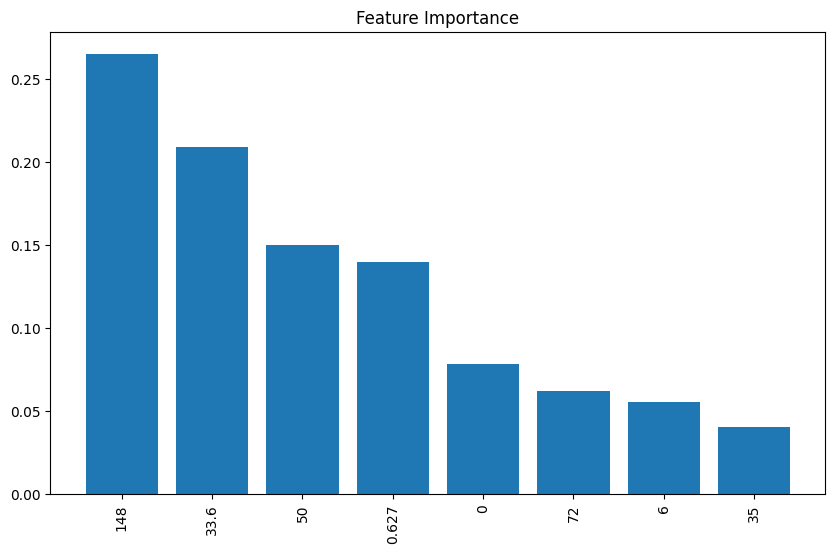

  Feature  Information Gain
0       6          0.055137
1     148          0.265374
2      72          0.061699
3      35          0.040358
4       0          0.078557
5    33.6          0.209244
6   0.627          0.139544
7      50          0.150086


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import graphviz
from IPython.display import Image

df = pd.read_csv('PIMA Indian Diabetes Dataset.csv')
df.head()

X = df.values[:, :-1]
y = df.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

plt.figure(figsize=(12, 8))
plot_tree(
    clf, 
    feature_names=df.columns[:-1], 
    class_names=['Diabetic', 'Non Diabetic'], 
    filled=True
)
plt.show()

dot_data = export_graphviz(
    clf, 
    out_file=None, 
    filled=True, 
    rounded=True,
    feature_names=df.columns[:-1], 
    class_names=['Non Diabetic', 'Diabetic']
)
graphviz.Source(dot_data, format="png", engine="dot").render("tree")

Image(filename="tree.png", width=1200)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), np.array(df.columns[:-1])[indices], rotation=90)
plt.show()

print(pd.DataFrame({
    'Feature': df.columns[:-1],
    'Information Gain': importances
}))